In [ ]:
!pip install transformers

In [ ]:
!pip install TextBlob

In [ ]:
!pip install nltk

In [ ]:
##### import neccessary data

import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from sklearn.tree import DecisionTreeClassifier

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import  RandomForestClassifier
from sklearn.metrics import confusion_matrix ,classification_report

In [ ]:
#### load data

df_fake = pd.read_csv("Fake.csv")
df_true = pd.read_csv("True.csv")

In [ ]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
##### create columns label , where true =1
df_true["label"] = 1

In [ ]:
df_true.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [ ]:
##### create columns label, fake=o
df_fake["label"] = 0
df_fake.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [ ]:
# Concatenate dataframes vertically (along rows)
df = pd.concat([df_true, df_fake])
df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [ ]:
df.columns

Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


# DATA VISUALIZATION

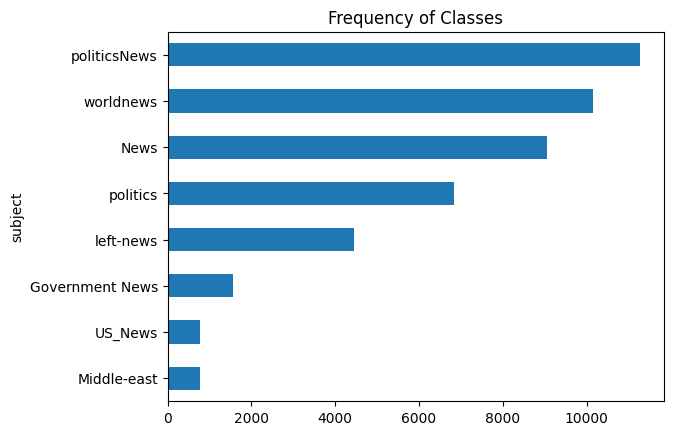

In [ ]:
df["subject"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

We are going to explore some features visualization

Text(0.5, 1.0, 'Count of Subjecs')

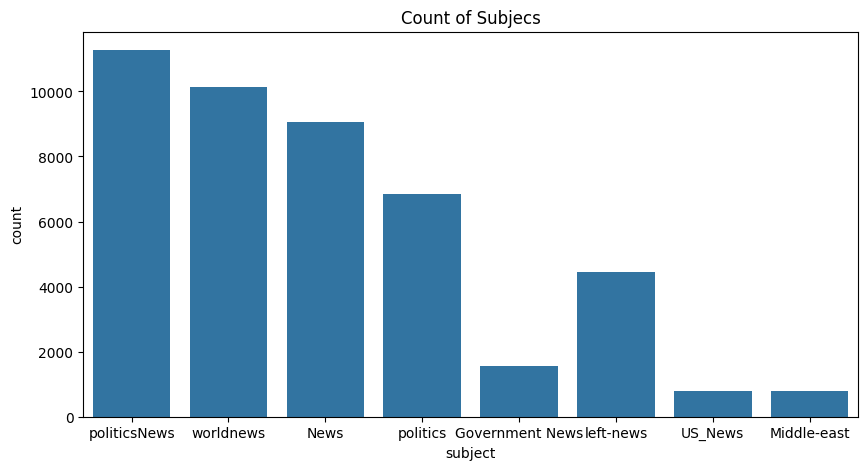

In [ ]:

#creating a count plot for subject column
fig = plt.figure(figsize=(10,5))

graph = sns.countplot(x="subject", data=df)
plt.title("Count of Subjecs")


Text(0.5, 1.0, 'Count of labels')

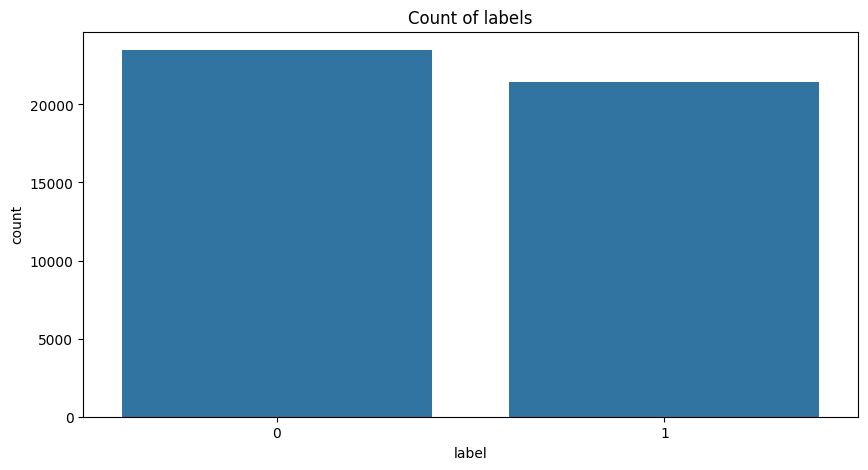

In [ ]:
#creating a count plot for subject column
fig = plt.figure(figsize=(10,5))

graph = sns.countplot(x="label", data=df, )
plt.title("Count of labels")


# the WordCloud Object

In [ ]:
from wordcloud import WordCloud


In [ ]:
fake_news = df[df["label"] == 0]
true_news = df[df["label"] == 1]

In [ ]:
fake_news = ' '.join(fake_news["text"])
true_news = ' '.join(true_news["text"])

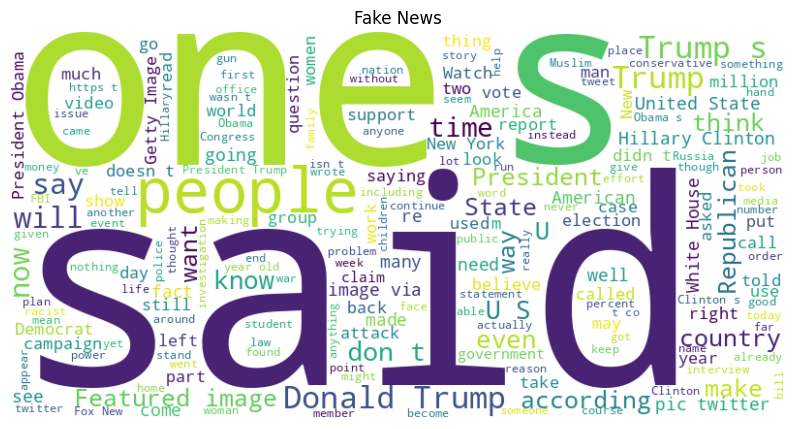

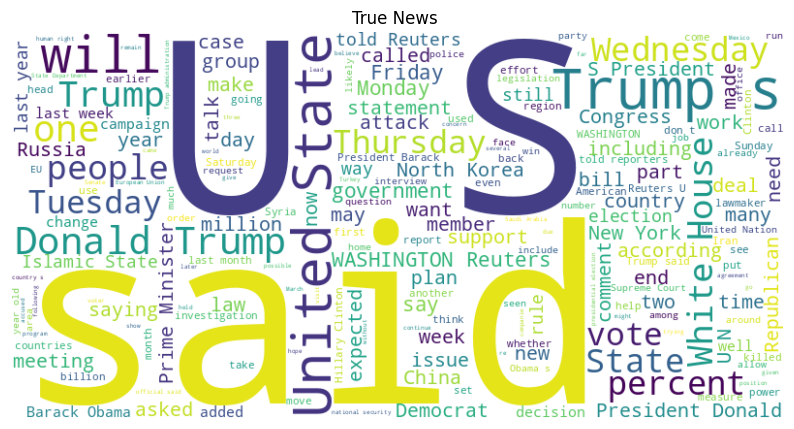

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(fake_news)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Fake News")
plt.show()

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(true_news)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("True News ")
plt.show()

In [ ]:
df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [ ]:
text=df["text"]

In [ ]:
text.head()

0    WASHINGTON (Reuters) - The head of a conservat...
1    WASHINGTON (Reuters) - Transgender people will...
2    WASHINGTON (Reuters) - The special counsel inv...
3    WASHINGTON (Reuters) - Trump campaign adviser ...
4    SEATTLE/WASHINGTON (Reuters) - President Donal...
Name: text, dtype: object

# DATA PREPROCESSING AND MODELING

In [ ]:
x = df[["text"]]
y = df["label"]

In [ ]:
x

,text
0,WASHINGTON (Reuters) - The head of a conservat...
1,WASHINGTON (Reuters) - Transgender people will...
2,WASHINGTON (Reuters) - The special counsel inv...
3,WASHINGTON (Reuters) - Trump campaign adviser ...
4,SEATTLE/WASHINGTON (Reuters) - President Donal...
...,...
23476,21st Century Wire says As 21WIRE reported earl...
23477,21st Century Wire says It s a familiar theme. ...
23478,Patrick Henningsen 21st Century WireRemember ...
23479,21st Century Wire says Al Jazeera America will...


In [ ]:
tdf = TfidfVectorizer()

x = tdf.fit_transform(x["text"])

In [ ]:
#####
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=41)

In [ ]:
mb = MultinomialNB()
lr  = LogisticRegression()
dct = DecisionTreeClassifier()
rfc = RandomForestClassifier()

In [ ]:
mb.fit(x_train , y_train)
lr.fit(x_train , y_train)
dct.fit(x_train , y_train)
rfc.fit(x_train , y_train)

RandomForestClassifier()

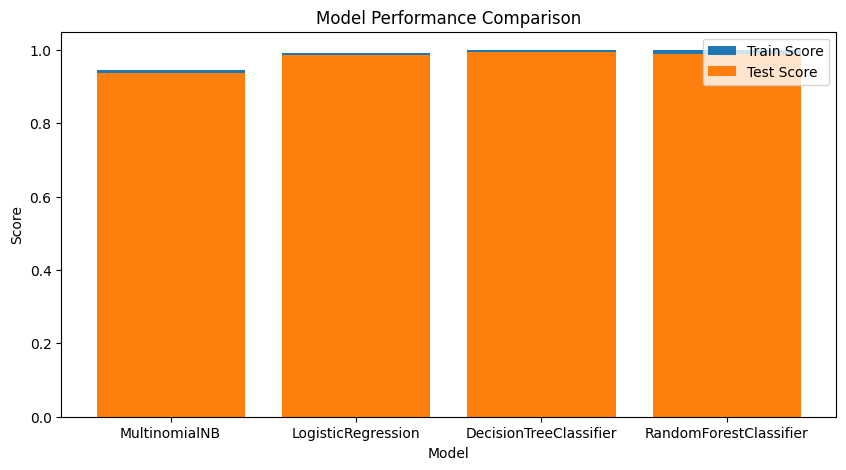

In [ ]:
plt.figure(figsize=(10,5))

train_scores = [mb.score(x_train, y_train), lr.score(x_train, y_train), dct.score(x_train, y_train), rfc.score(x_train, y_train)]
test_scores = [mb.score(x_test, y_test), lr.score(x_test, y_test), dct.score(x_test, y_test), rfc.score(x_test, y_test)]

model_names = ['MultinomialNB', 'LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier']

plt.bar(model_names, train_scores, label="Train Score")
plt.bar(model_names, test_scores, label="Test Score")

plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.legend()
plt.show()

MultinomialNB


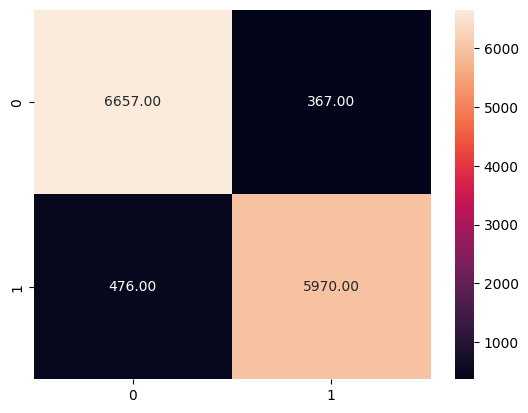

LogisticRegression


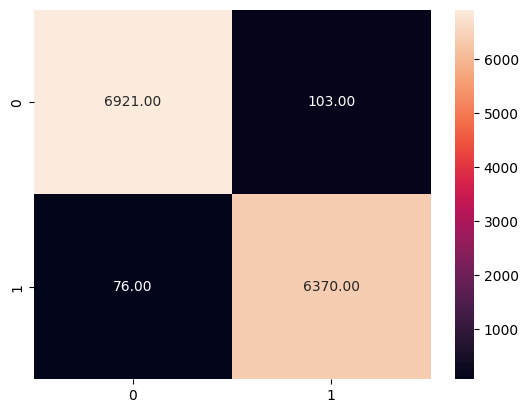

DecisionTreeClassifier


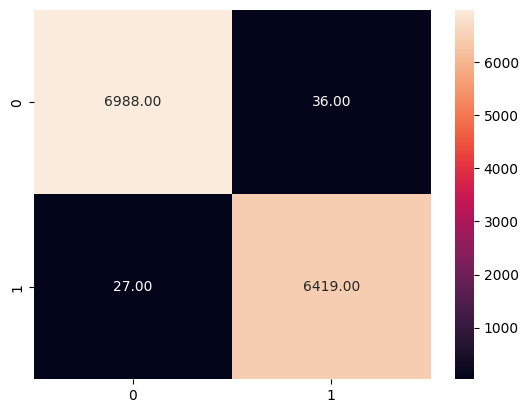

RandomForestClassifier


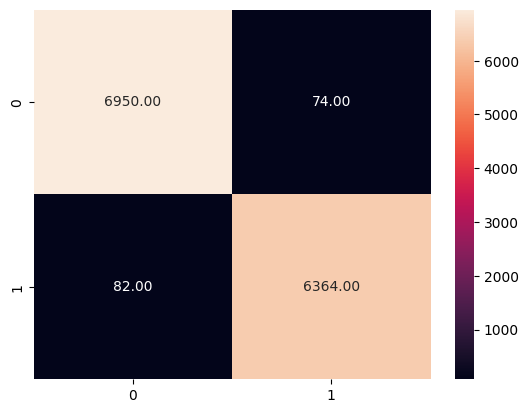

In [ ]:
mod = [mb,lr,dct ,rfc]  # Assuming dtc, rfc, gbc, lr are trained models
model_name = ['MultinomialNB', 'LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier']
for model, model_name in zip(mod, model_name):
    corr = confusion_matrix(y_test, model.predict(x_test))
    print(model_name)
    sns.heatmap(corr, annot=True, fmt="0.2f")
    plt.show()  # Show each confusion matrix separately

# SENTIMENT ANALYSIS USING BERT TRANSFORMERS

In [ ]:
train_ds = text.iloc[0]

In [ ]:
len(train_ds)

4659

In [ ]:
train_ds[0]

'W'

In [ ]:
train_ds = text

In [ ]:
print(train_ds[:7])

0    WASHINGTON (Reuters) - The head of a conservat...
1    WASHINGTON (Reuters) - Transgender people will...
2    WASHINGTON (Reuters) - The special counsel inv...
3    WASHINGTON (Reuters) - Trump campaign adviser ...
4    SEATTLE/WASHINGTON (Reuters) - President Donal...
5    WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...
6    WEST PALM BEACH, Fla (Reuters) - President Don...
Name: text, dtype: object


In [ ]:
from transformers import pipeline

classifier = pipeline("text-classification")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that aut

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [ ]:
# Print the text in row 10 (index 9, as indexing starts from 0)
row_10_text = df.iloc[9]['text']
print( row_10_text)

WASHINGTON (Reuters) - Alabama Secretary of State John Merrill said he will certify Democratic Senator-elect Doug Jones as winner on Thursday despite opponent Roy Moore’s challenge, in a phone call on CNN. Moore, a conservative who had faced allegations of groping teenage girls when he was in his 30s, filed a court challenge late on Wednesday to the outcome of a U.S. Senate election he unexpectedly lost. 


In [ ]:
outputs = classifier(row_10_text)
pd.DataFrame(outputs)

,label,score
0,NEGATIVE,0.998126


In [ ]:
# Print the text in row 3589 (index 3588, as indexing starts from 0)
row_112_text = df.iloc[112]['text']
print( row_112_text)

WASHINGTON (Reuters) - White House legislative director Marc Short said he expects Congress to pass a short-term spending bill to fund the federal government at least into January, he told CNBC in an interview on Monday, days before current funding expires on Friday.  “I don’t think anybody wants to see government shut down,” Short told CNBC. “We’re very optimistic that we’re going to find a resolution this week.” 


In [ ]:
outputs = classifier(row_112_text)
pd.DataFrame(outputs)

,label,score
0,NEGATIVE,0.993109


In [ ]:
import torch
from transformers import BertTokenizer, BertForTokenClassification

# Load pre-trained BERT model and tokenizer
model_name = "dbmdz/bert-large-cased-finetuned-conll03-english"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForTokenClassification.from_pretrained(model_name)

# Function to perform POS tagging using BERT
def pos_tagging_bert(text):
    # Tokenize input text
    tokens = tokenizer.tokenize(tokenizer.decode(tokenizer.encode(text)))
    inputs = tokenizer.encode(text, return_tensors="pt")

    # Get predictions
    outputs = model(inputs).logits
    predictions = torch.argmax(outputs, dim=2)

    # Map predictions to tags
    id2label = {i: label for i, label in enumerate(model.config.id2label)}
    tags = [id2label[pred.item()] for pred in predictions[0]]

    # Combine tokens and tags
    token_tag_pairs = list(zip(tokens, tags))
    return token_tag_pairs

# Apply POS tagging to each row in the DataFrame
df['POS_Tags_BERT'] = df['text'].apply(pos_tagging_bert)

# Print the DataFrame
print(df)

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Token indices sequence length is longer than the specified maximum sequence length for this model (964 > 512). Running this sequence through the model will result in indexing errors


RuntimeError: The expanded size of the tensor (964) must match the existing size (512) at non-singleton dimension 1.  Target sizes: [1, 964].  Tensor sizes: [1, 512]